# Bubble reachers and uncivil discourse in polarized online public sphere 

Jordan Kobellarz (UTFPR), Milos Brocic (McGill University), Daniel Silver (University of Toronto) and Thiago H. Silva (UTFPR)


# Instructions

1 - Download ```Bubble_Reachers_and_Uncivil_Discourse_2023_comments.csv``` from [this link](https://drive.google.com/file/d/1ihiYa9_u_HfXOaNP6qWHfbAV80z6XeRO/view?usp=sharing) and put on ```/data``` folder

2 - Execute this notebook 

In [1]:
!pip install --no-cache-dir -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 11.6 MB/s eta 0:00:0031m11.6 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
terminal-copilot 1.0.7 requires numpy==1.23.5, but you have numpy 1.21.3 which is incompatible.
terminal-copilot 1.0.7 requires openpyxl==3.0.10, but you have openpyxl 3.0.5 which is incompatible.
terminal-copilot 1.0.7 requires pandas==1.5.2, but you have pandas 1.3.4 which is incompatible.
terminal-copilot 1.0.7 requires pytz==2022.6, but you have pytz 2023.3 which is incompatible.
terminal-copilot 1.0.7 requires requests==2.28.1, but you have requests 2.28.2 which is incompatible.
terminal-copilot 1.0.7 requires tqdm==4.64.1, but you have tqdm 4.65.0 which is

In [2]:
%matplotlib inline

from tqdm.notebook import trange, tqdm
from core import *

COMPARE_DATASETS = ['NEUTRAL_REACHER_pt', 'PARTISAN_pt', 'NEUTRAL_REACHER_en', 'PARTISAN_REACHER_en']
REFERENCE_DATASETS = ['CIVIL_pt', 'CIVIL_en', 'UNCIVIL_pt', 'UNCIVIL_en']
MISC_DATASETS = ['FACEBOOK_NEUTRAL_en', 'FACEBOOK_PARTISAN_en', 'FACEBOOK_PERSON_en', 'FACEBOOK_OTHER_en', 'G1_SITE_pt', 'NYT_SITE_en', 'YAHOO_SITE_en']

ALL_DATASETS = COMPARE_DATASETS + REFERENCE_DATASETS + MISC_DATASETS

In [4]:
comments_dataset_path = 'data/Bubble_Reachers_and_Uncivil_Discourse_2023_comments.csv'

In [5]:
df_comments = pd.read_csv(comments_dataset_path)

# Exploratory Analysis

#### Toxicity box plots for all datasets 

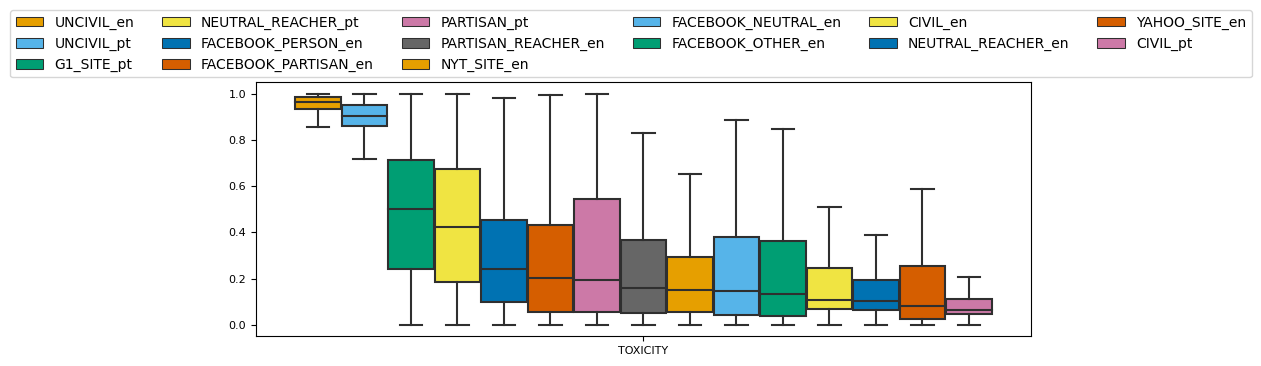

In [6]:
df, df_summarized = analyze_comments_dataframe(df_comments, ['TOXICITY'], group_by='dataset', legend_ncols=6, width=10, sort_by_median=True)

#### Sources toxicity boxplots

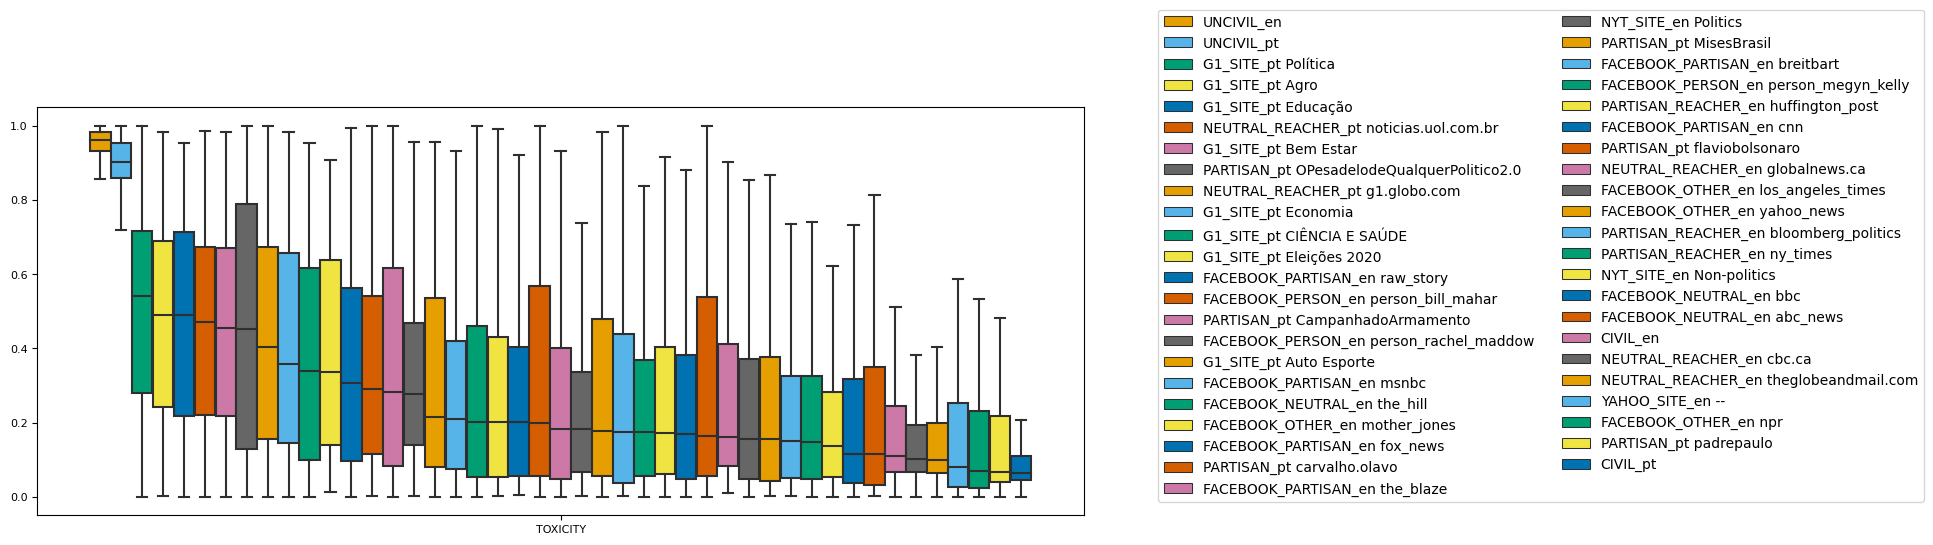

In [7]:
df, df_summarized = analyze_comments_dataframe(df_comments, ['TOXICITY'], group_by='dataset_source', legend_ncols=2, legend_top=False, sort_by_median=True)

# Datasets summary

In [8]:
df = df_comments.groupby([
    'dataset'
], as_index=False).agg(
    count=('source', 'count'), 
    mean=('TOXICITY', 'mean'), 
    median=('TOXICITY', 'median'), 
    std=('TOXICITY', 'std')
).reset_index().sort_values(['count', 'dataset'])

# sort datasets according to ALL_DATASETS sequence
df['dataset'] = df['dataset'].astype("category")
df['dataset'] = df['dataset'].cat.set_categories(ALL_DATASETS)
df = df.sort_values('dataset')

# project important columns
df = df[['dataset', 'count', 'mean', 'median', 'std']]

# round values
df = df.round({'mean': 2, 'median': 2, 'std': 2})

# rename columns
df_datasets_stats = df.rename(columns={
    'dataset': 'Dataset',
    'count': 'N',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'STD'
})

df_datasets_stats

,Dataset,N,Mean,Median,STD
8,NEUTRAL_REACHER_pt,122836,0.44,0.42,0.27
11,PARTISAN_pt,24741,0.32,0.20,0.30
7,NEUTRAL_REACHER_en,113114,0.17,0.10,0.17
10,PARTISAN_REACHER_en,28070,0.24,0.16,0.23
1,CIVIL_pt,0,0.12,0.06,0.15
0,CIVIL_en,0,0.19,0.11,0.19
13,UNCIVIL_pt,0,0.87,0.90,0.14
12,UNCIVIL_en,0,0.95,0.96,0.06
2,FACEBOOK_NEUTRAL_en,57839,0.23,0.14,0.23
4,FACEBOOK_PARTISAN_en,118910,0.27,0.20,0.24


#### Sources summary

In [9]:
df = df_comments.groupby([
    'dataset', 'source',
], as_index=False).agg(
    count=('source', 'count'), 
    mean=('TOXICITY', 'mean'), 
    median=('TOXICITY', 'median'), 
    std=('TOXICITY', 'std')
).reset_index().sort_values(['count', 'dataset'])

# sort datasets according to ALL_DATASETS sequence
df['dataset'] = df['dataset'].astype("category")
df['dataset'] = df['dataset'].cat.set_categories(ALL_DATASETS)
df = df.sort_values('dataset')

# round values
df = df.round({'mean': 2, 'median': 2, 'std': 2})

df = df[['dataset', 'source', 'count', 'mean', 'median', 'std']]

# rename columns
df_sources_stats = df.rename(columns={
    'dataset': 'Dataset',
    'source': 'Source',
    'count': 'N',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'STD'
})

df_sources_stats

,Dataset,Source,N,Mean,Median,STD
28,NEUTRAL_REACHER_pt,noticias.uol.com.br,67779,0.45,0.47,0.26
27,NEUTRAL_REACHER_pt,g1.globo.com,55057,0.42,0.40,0.28
38,PARTISAN_pt,flaviobolsonaro,4307,0.30,0.16,0.28
35,PARTISAN_pt,MisesBrasil,3508,0.29,0.18,0.27
34,PARTISAN_pt,CampanhadoArmamento,4199,0.36,0.28,0.30
39,PARTISAN_pt,padrepaulo,4203,0.16,0.07,0.20
37,PARTISAN_pt,carvalho.olavo,4218,0.32,0.20,0.30
36,PARTISAN_pt,OPesadelodeQualquerPolitico2.0,4306,0.46,0.45,0.32
24,NEUTRAL_REACHER_en,cbc.ca,97932,0.17,0.10,0.17
25,NEUTRAL_REACHER_en,globalnews.ca,2038,0.28,0.16,0.26


# Comparative datasets toxicity analysis

In [10]:
group_by = 'dataset'
attributes = ['TOXICITY']
datasets = COMPARE_DATASETS

df_comments_filtered = df_comments[df_comments['dataset'].isin(datasets)]

#### Features boxplots

value                    
                                   mean    median       std
attribute dataset                                          
TOXICITY  UNCIVIL_en           0.946027  0.962116  0.063166
          UNCIVIL_pt           0.867629  0.902384  0.141296
          NEUTRAL_REACHER_pt   0.435157  0.423676  0.267273
          PARTISAN_pt          0.315631  0.195099  0.297255
          PARTISAN_REACHER_en  0.239752  0.158830  0.228885
          CIVIL_en             0.190912  0.108831  0.194194
          NEUTRAL_REACHER_en   0.171491  0.102556  0.171615
          CIVIL_pt             0.115902  0.063892  0.146077

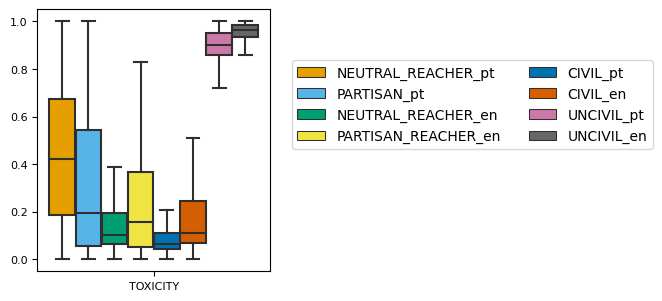

In [11]:
df = df_comments[df_comments[group_by].isin(datasets + REFERENCE_DATASETS)]

df_melted, df_summarized = analyze_comments_dataframe(
    df, attributes, group_by=group_by, hue_order=datasets + REFERENCE_DATASETS, 
    legend_top=False, legend_ncols=2, width=3
)

df_summarized

#### Prepare the plot for paper

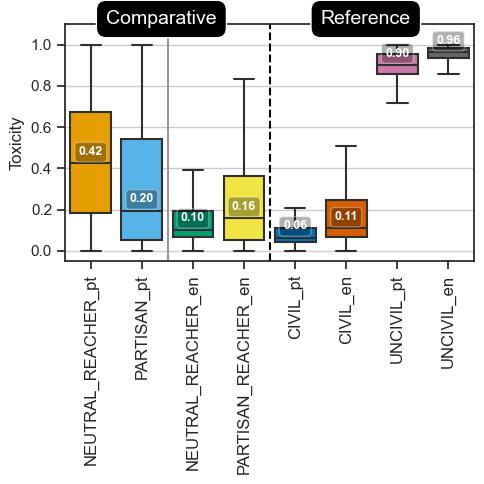

In [12]:
def add_hline_and_group_labels(ax):
    # add labels for groups
    plt.text(0.3, 1.1, 'Comparative', bbox=dict(facecolor='#000', boxstyle='round,pad=0.5'), fontsize=14, color='#fff')
    plt.text(4.5, 1.1, 'Reference', bbox=dict(facecolor='#000', boxstyle='round,pad=0.5'), fontsize=14, color='#fff')

    plt.ylim(-0.05, 1.1)
    ax.axvline(3.51, ls='--', color='#000')
    
    # portuguese | english separator
    ax.axvline(x=1.51, color='#999')

ax = plot_toxicity_boxplots_to_paper(
    df, group_by=group_by, width=5, height=5, callback=add_hline_and_group_labels, save_as='fig_perspective_by_dataset.png'
)

#### Check normal distribution with Q-Q Plots and histograms

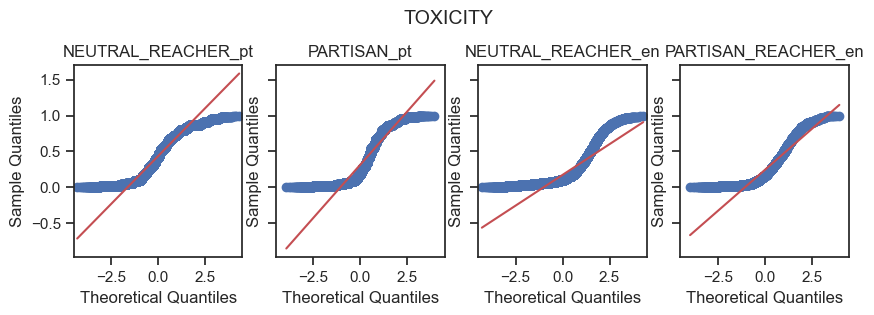

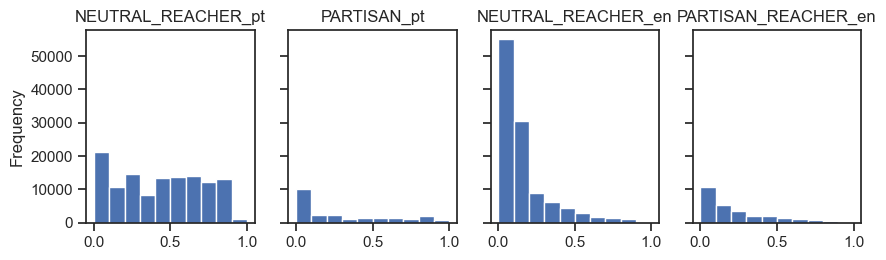

In [13]:
plot_qq(df_comments_filtered, 'dataset')

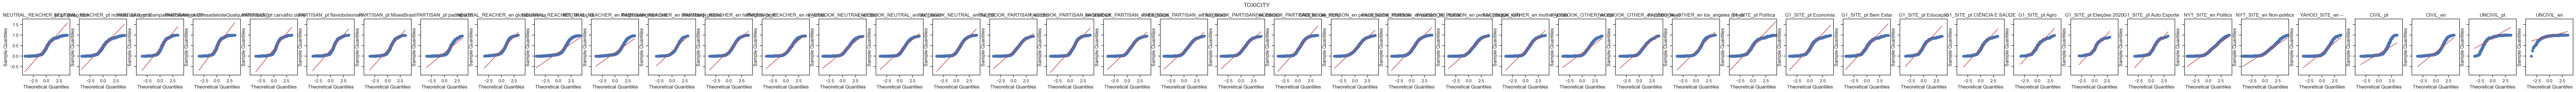

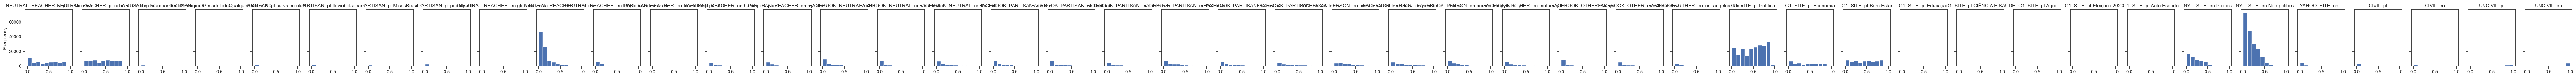

In [14]:
plot_qq(df_comments, 'dataset_source')

Plots above shows that all datasets and related sources don't have normally distributed toxicity values. 

#### D’Agostino Normal Test

**$H_0$**: sample (dataset or source) come from a normal distribution.

**$H_1$**: sample (dataset or source) does not come from a normal distribution.

In [15]:
run_normal_test(df_comments_filtered, 'dataset')

,dataset,k²,k² (with p),N,p-value
0,NEUTRAL_REACHER_pt,471793.462123,471793.4621***,122836,0.0
1,PARTISAN_pt,4763.455116,4763.4551***,24741,0.0
2,NEUTRAL_REACHER_en,45481.837157,45481.8372***,113114,0.0
3,PARTISAN_REACHER_en,4285.822887,4285.8229***,28070,0.0


#### Pairwise Two Sample Kolmogorov-Smirnov Test

**$H_0$**: datasets originate from the same distribution.

**$H_1$**: datasets do not originate from the same distribution.

In [16]:
run_ks_test(df_comments_filtered, group_by, report_h0_acceptance=True, alpha=.05)

,NEUTRAL_REACHER_pt,PARTISAN_pt,NEUTRAL_REACHER_en,PARTISAN_REACHER_en
NEUTRAL_REACHER_pt,,0.264***,0.508***,0.356***
PARTISAN_pt,,,0.274***,0.151***
NEUTRAL_REACHER_en,,,,0.194***
PARTISAN_REACHER_en,,,,


# Comparative sources toxicity analysis

In [17]:
group_by = 'dataset_source'
attribute = ['TOXICITY']
datasets = COMPARE_DATASETS

df_comments_filtered = df_comments[df_comments['dataset'].isin(datasets)]

#### Features boxplots

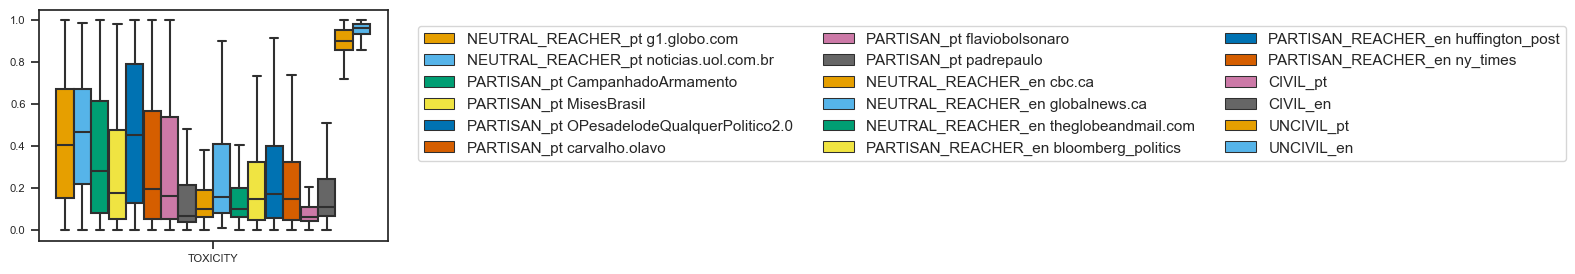

In [18]:
df = df_comments[df_comments['dataset'].isin(datasets + REFERENCE_DATASETS)].copy()

# sort by dataset and source name
df.loc[:, 'dataset'] = df['dataset'].astype('category')
df['dataset'].cat.set_categories(datasets + REFERENCE_DATASETS, inplace=True)
df = df.sort_values(['dataset', 'source'], ascending=[True, True])

df_melted, df_summarized = analyze_comments_dataframe(
    df, attributes, group_by=group_by,                      
    width=4.5, height=3, legend_top=False, legend_ncols=3
)

#### Prepare plot for paper

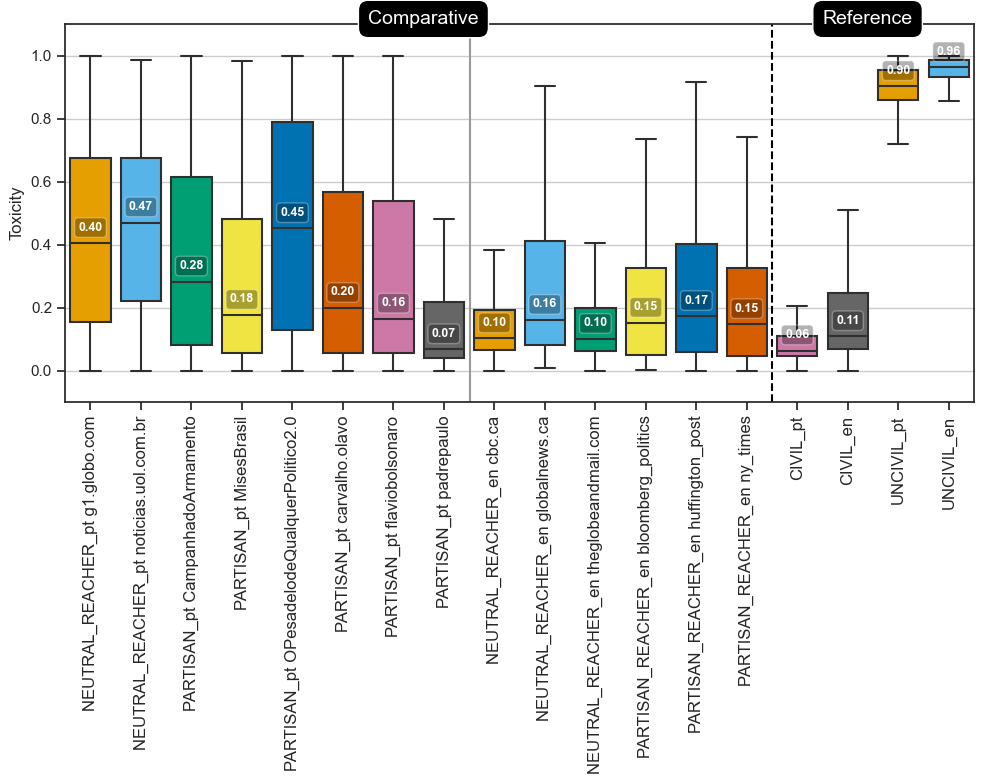

In [19]:
def add_hline_and_group_labels(ax):
    # add labels for groups
    plt.text(5.5, 1.1, 'Comparative', bbox=dict(facecolor='#000', boxstyle='round,pad=0.5'), fontsize=14, color='#fff')
    plt.text(14.5, 1.1, 'Reference', bbox=dict(facecolor='#000', boxstyle='round,pad=0.5'), fontsize=14, color='#fff')

    plt.ylim(-0.1, 1.1)
    ax.axvline(13.5, ls='--', color='#000')
    
    # portuguese | english separator
    ax.axvline(x=7.51, color='#999')

ax = plot_toxicity_boxplots_to_paper(
    df, group_by=group_by, width=10, height=8, callback=add_hline_and_group_labels, save_as='fig_perspective_by_source.png'
)

#### Check normal distribution with Q-Q Plots and histograms

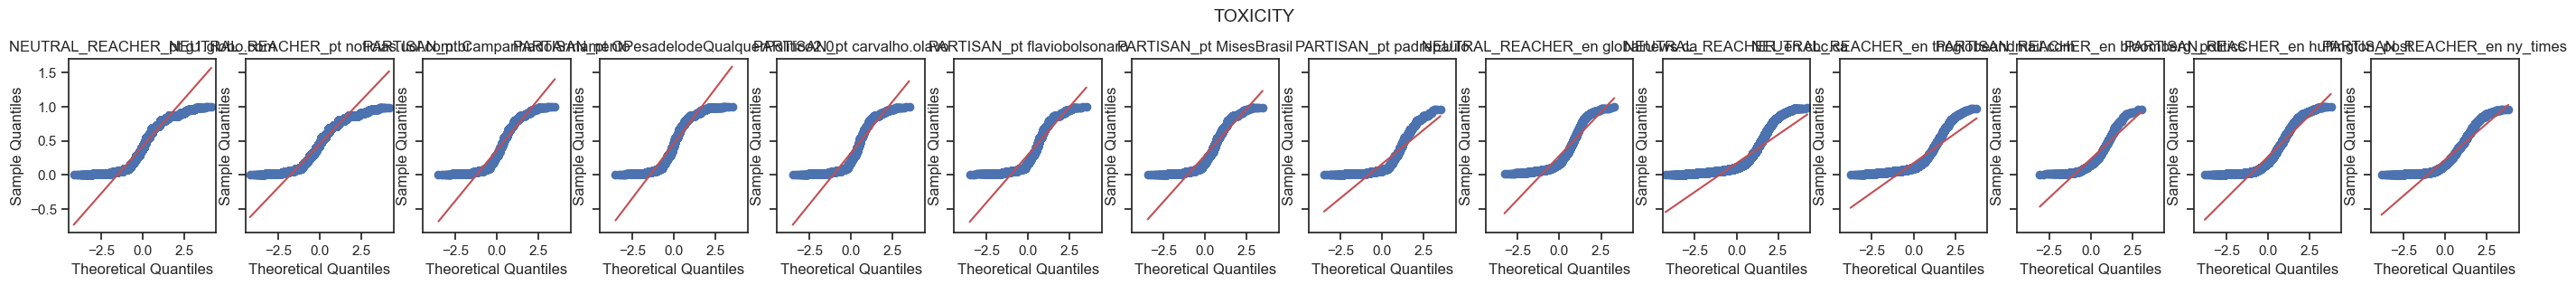

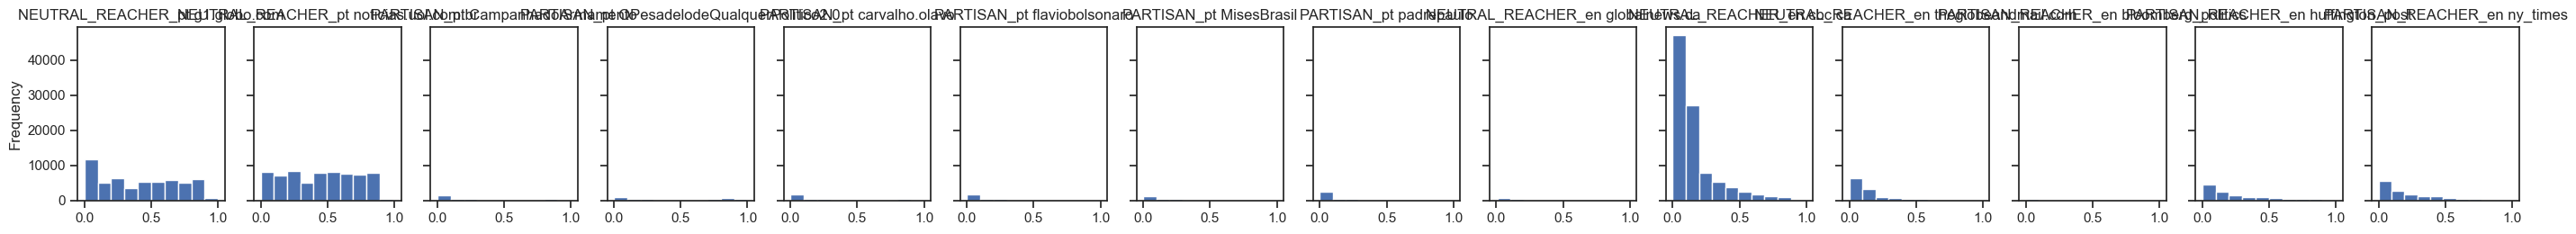

In [20]:
plot_qq(df_comments_filtered, group_by)

#### D’Agostino Normal Test

In [21]:
run_normal_test(df_comments_filtered, group_by)

,dataset_source,k²,k² (with p),N,p-value
0,NEUTRAL_REACHER_pt g1.globo.com,982481.040963,982481.041***,55057,0.000000e+00
1,NEUTRAL_REACHER_pt noticias.uol.com.br,92809.128090,92809.1281***,67779,0.000000e+00
2,PARTISAN_pt CampanhadoArmamento,2932.335642,2932.3356***,4199,0.000000e+00
3,PARTISAN_pt OPesadelodeQualquerPolitico2.0,27061.590627,27061.5906***,4306,0.000000e+00
4,PARTISAN_pt carvalho.olavo,1017.082951,1017.083***,4218,1.390731e-221
5,PARTISAN_pt flaviobolsonaro,559.563944,559.5639***,4307,3.106228e-122
6,PARTISAN_pt MisesBrasil,409.620791,409.6208***,3508,1.127134e-89
7,PARTISAN_pt padrepaulo,1299.813160,1299.8132***,4203,5.612529e-283
8,NEUTRAL_REACHER_en globalnews.ca,312.469701,312.4697***,2038,1.406263e-68
9,NEUTRAL_REACHER_en cbc.ca,40039.288619,40039.2886***,97932,0.000000e+00


#### Kolmogorov-Smirnov Test

In [22]:
run_ks_test(df_comments_filtered, group_by, report_h0_acceptance=True, alpha=.05)

PARTISAN_REACHER_en bloomberg_politics (N = 888)   VS  PARTISAN_REACHER_en ny_times (N = 14169) 	KS = 0.031420659490742076	p-value = 0.3734180530367309 



,NEUTRAL_REACHER_pt g1.globo.com,NEUTRAL_REACHER_pt noticias.uol.com.br,PARTISAN_pt CampanhadoArmamento,PARTISAN_pt OPesadelodeQualquerPolitico2.0,PARTISAN_pt carvalho.olavo,PARTISAN_pt flaviobolsonaro,PARTISAN_pt MisesBrasil,PARTISAN_pt padrepaulo,NEUTRAL_REACHER_en globalnews.ca,NEUTRAL_REACHER_en cbc.ca,NEUTRAL_REACHER_en theglobeandmail.com,PARTISAN_REACHER_en bloomberg_politics,PARTISAN_REACHER_en huffington_post,PARTISAN_REACHER_en ny_times
NEUTRAL_REACHER_pt g1.globo.com,,0.08***,0.138***,0.122***,0.22***,0.245***,0.238***,0.46***,0.282***,0.47***,0.456***,0.345***,0.28***,0.34***
NEUTRAL_REACHER_pt noticias.uol.com.br,,,0.218***,0.138***,0.299***,0.324***,0.316***,0.54***,0.36***,0.549***,0.534***,0.424***,0.358***,0.419***
PARTISAN_pt CampanhadoArmamento,,,,0.138***,0.086***,0.109***,0.112***,0.325***,0.166***,0.357***,0.342***,0.232***,0.172***,0.237***
PARTISAN_pt OPesadelodeQualquerPolitico2.0,,,,,0.194***,0.229***,0.232***,0.429***,0.287***,0.469***,0.455***,0.345***,0.307***,0.367***
PARTISAN_pt carvalho.olavo,,,,,,0.044***,0.062***,0.242***,0.173***,0.281***,0.266***,0.162***,0.128***,0.187***
PARTISAN_pt flaviobolsonaro,,,,,,,0.036*,0.241***,0.155***,0.251***,0.237***,0.127***,0.091***,0.151***
PARTISAN_pt MisesBrasil,,,,,,,,0.242***,0.17***,0.257***,0.242***,0.132***,0.077***,0.136***
PARTISAN_pt padrepaulo,,,,,,,,,0.382***,0.322***,0.307***,0.268***,0.301***,0.248***
NEUTRAL_REACHER_en globalnews.ca,,,,,,,,,,0.205***,0.196***,0.182***,0.153***,0.195***
NEUTRAL_REACHER_en cbc.ca,,,,,,,,,,,0.021***,0.17***,0.23***,0.172***


# Facebook sources analysis

On this section we try to understand if the Facebook dataset shows diversity between pages' comments toxicity.

In [23]:
group_by = 'dataset_source'
attributes = ['TOXICITY']
datasets = [
    # all Facebook datasets
    'PARTISAN_pt', 'PARTISAN_REACHER_en', 
    'FACEBOOK_NEUTRAL_en', 'FACEBOOK_PARTISAN_en', 
    'FACEBOOK_PERSON_en', 'FACEBOOK_OTHER_en'
]

df_comments_filtered = df_comments[df_comments['dataset'].isin(datasets)].copy()

# sort datasets by dataset and source name
df_comments_filtered.loc[:, 'dataset'] = df_comments_filtered['dataset'].astype('category')
df_comments_filtered['dataset'].cat.set_categories(datasets, inplace=True)
df_comments_filtered = df_comments_filtered.sort_values(['dataset', 'source'], ascending=[True, True])

<AxesSubplot: ylabel='Toxicity'>

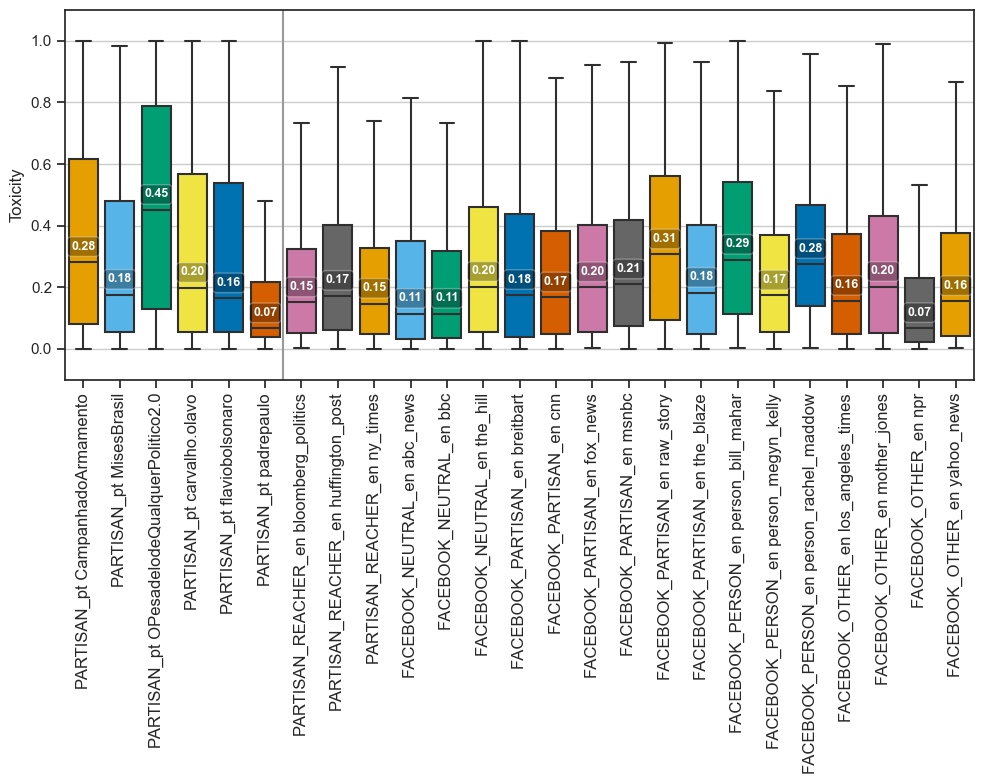

In [24]:
def add_hline_and_group_labels(ax):
    plt.ylim(-0.1, 1.1)
    ax.axvline(5.5, color='#999999')

plot_toxicity_boxplots_to_paper(
    df_comments_filtered, group_by=group_by, width=10, height=8, callback=add_hline_and_group_labels, save_as='fig_facebook_perspective_by_source.png'
)

#### Check normal distribution with Q-Q Plots and histograms

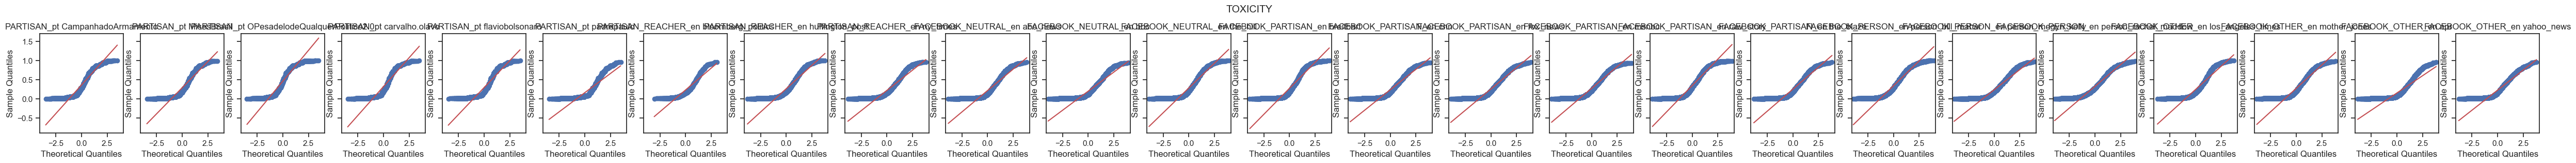

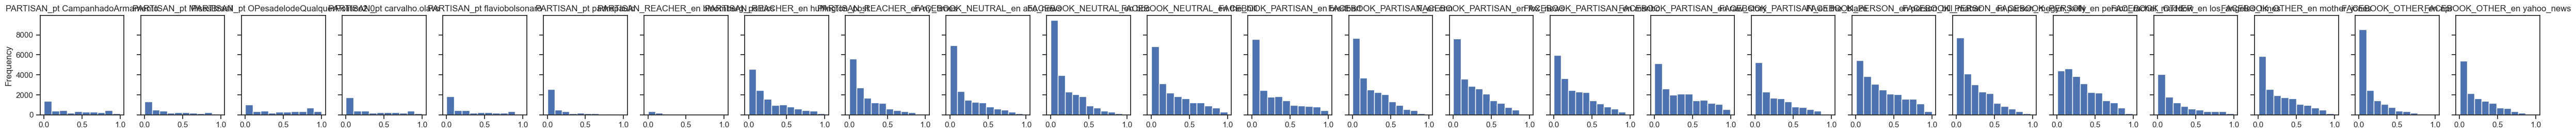

In [25]:
plot_qq(df_comments_filtered, group_by)

#### D’Agostino Normal Test

In [26]:
run_normal_test(df_comments_filtered, group_by)

,dataset_source,k²,k² (with p),N,p-value
0,PARTISAN_pt CampanhadoArmamento,2932.335642,2932.3356***,4199,0.000000e+00
1,PARTISAN_pt MisesBrasil,409.620791,409.6208***,3508,1.127134e-89
2,PARTISAN_pt OPesadelodeQualquerPolitico2.0,27061.590627,27061.5906***,4306,0.000000e+00
3,PARTISAN_pt carvalho.olavo,1017.082951,1017.083***,4218,1.390731e-221
4,PARTISAN_pt flaviobolsonaro,559.563944,559.5639***,4307,3.106228e-122
5,PARTISAN_pt padrepaulo,1299.813160,1299.8132***,4203,5.612529e-283
6,PARTISAN_REACHER_en bloomberg_politics,174.651155,174.6512***,888,1.188457e-38
7,PARTISAN_REACHER_en huffington_post,1626.502491,1626.5025***,13013,0.000000e+00
8,PARTISAN_REACHER_en ny_times,2478.502458,2478.5025***,14169,0.000000e+00
9,FACEBOOK_NEUTRAL_en abc_news,2280.718193,2280.7182***,15663,0.000000e+00


#### Kolmogorov-Smirnov Test

In [27]:
run_ks_test(df_comments_filtered, group_by, report_h0_acceptance=True, alpha=.05)

PARTISAN_REACHER_en bloomberg_politics (N = 888)   VS  PARTISAN_REACHER_en ny_times (N = 14169) 	KS = 0.031420659490742076	p-value = 0.3734180530367309 



,PARTISAN_pt CampanhadoArmamento,PARTISAN_pt MisesBrasil,PARTISAN_pt OPesadelodeQualquerPolitico2.0,PARTISAN_pt carvalho.olavo,PARTISAN_pt flaviobolsonaro,PARTISAN_pt padrepaulo,PARTISAN_REACHER_en bloomberg_politics,PARTISAN_REACHER_en huffington_post,PARTISAN_REACHER_en ny_times,FACEBOOK_NEUTRAL_en abc_news,...,FACEBOOK_PARTISAN_en msnbc,FACEBOOK_PARTISAN_en raw_story,FACEBOOK_PARTISAN_en the_blaze,FACEBOOK_PERSON_en person_bill_mahar,FACEBOOK_PERSON_en person_megyn_kelly,FACEBOOK_PERSON_en person_rachel_maddow,FACEBOOK_OTHER_en los_angeles_times,FACEBOOK_OTHER_en mother_jones,FACEBOOK_OTHER_en npr,FACEBOOK_OTHER_en yahoo_news
PARTISAN_pt CampanhadoArmamento,,0.112***,0.138***,0.086***,0.109***,0.325***,0.232***,0.172***,0.237***,0.219***,...,0.182***,0.078***,0.195***,0.106***,0.224***,0.151***,0.197***,0.164***,0.322***,0.226***
PARTISAN_pt MisesBrasil,,,0.232***,0.062***,0.036*,0.242***,0.132***,0.077***,0.136***,0.164***,...,0.112***,0.151***,0.101***,0.186***,0.13***,0.232***,0.094***,0.07***,0.259***,0.131***
PARTISAN_pt OPesadelodeQualquerPolitico2.0,,,,0.194***,0.229***,0.429***,0.345***,0.307***,0.367***,0.355***,...,0.318***,0.209***,0.331***,0.221***,0.361***,0.272***,0.323***,0.3***,0.435***,0.362***
PARTISAN_pt carvalho.olavo,,,,,0.044***,0.242***,0.162***,0.128***,0.187***,0.175***,...,0.14***,0.152***,0.151***,0.187***,0.181***,0.233***,0.143***,0.12***,0.264***,0.182***
PARTISAN_pt flaviobolsonaro,,,,,,0.241***,0.127***,0.091***,0.151***,0.194***,...,0.127***,0.166***,0.119***,0.201***,0.145***,0.246***,0.116***,0.098***,0.294***,0.147***
PARTISAN_pt padrepaulo,,,,,,,0.268***,0.301***,0.248***,0.201***,...,0.351***,0.39***,0.287***,0.426***,0.302***,0.471***,0.254***,0.309***,0.131***,0.255***
PARTISAN_REACHER_en bloomberg_politics,,,,,,,,0.077***,0.031,0.107***,...,0.15***,0.242***,0.114***,0.227***,0.071***,0.237***,0.048*,0.137***,0.216***,0.069***
PARTISAN_REACHER_en huffington_post,,,,,,,,,0.067***,0.128***,...,0.076***,0.17***,0.051***,0.151***,0.065***,0.179***,0.05***,0.062***,0.244***,0.075***
PARTISAN_REACHER_en ny_times,,,,,,,,,,0.089***,...,0.134***,0.231***,0.098***,0.213***,0.067***,0.235***,0.047***,0.12***,0.191***,0.052***
FACEBOOK_NEUTRAL_en abc_news,,,,,,,,,,,...,0.155***,0.212***,0.09***,0.261***,0.132***,0.305***,0.086***,0.113***,0.125***,0.065***


# G1 Analysis

G1_SITE_pt is a dataset chosen to be compared with the portal g1.globo.com - within the NEUTRAL_REACHER_pt dataset, so that it was possible to identify whether there were differences between a political dataset, which is the case of NEUTRAL_REACHER_pt, and a set of data on various subjects, which is the case of G1_SITE_pt.

In [28]:
group_by = 'dataset_source'
attributes = ['TOXICITY']
G1_sources = [
    'NEUTRAL_REACHER_pt g1.globo.com', 
    
    'G1_SITE_pt Política', 'G1_SITE_pt Eleições 2020',
    
    'G1_SITE_pt Bem Estar', 'G1_SITE_pt Educação', 'G1_SITE_pt Agro', 'G1_SITE_pt Economia', 
        
    'G1_SITE_pt CIÊNCIA E SAÚDE', 'G1_SITE_pt Auto Esporte', 'G1_SITE_pt Fato ou Fake',
]

df_comments_filtered = df_comments[df_comments['dataset_source'].isin(G1_sources)]

# reorder sources before plot
# sort datasets according manual sequence
df_comments_filtered.loc[:, 'dataset_source'] = df_comments_filtered['dataset_source'].astype('category')
df_comments_filtered['dataset_source'].cat.set_categories(G1_sources, inplace=True)
df_comments_filtered = df_comments_filtered.sort_values('dataset_source', ascending=True).copy()
df_comments_filtered.loc[:, 'dataset_source'] = df_comments_filtered['dataset_source'].astype('str')

/home/jordan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


 #### TOXICITY by source inside G1_SITE_pt dataset and NEUTRAL_REACHER_pt g1.globo.com source

<AxesSubplot: ylabel='Toxicity'>

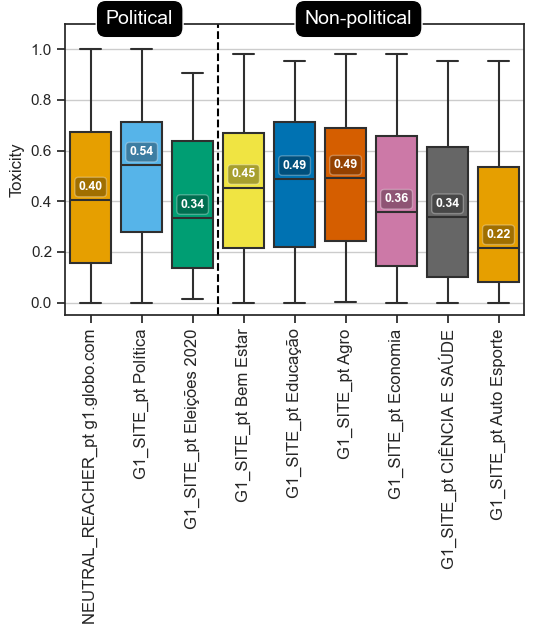

In [29]:
def add_hline_and_group_labels(ax):
    # add labels for groups
    plt.text(0.3, 1.1, 'Political', bbox=dict(facecolor='#000', boxstyle='round,pad=0.5'), fontsize=14, color='#fff')
    #plt.text(-0.25, -0.1, 'Portuguese', bbox=dict(facecolor='#ccc', boxstyle='round,pad=0.2'), fontsize=10, color='#666')
    #plt.text(2, -0.1, 'English', bbox=dict(facecolor='#ccc', boxstyle='round,pad=0.2'), fontsize=10, color='#666')
    plt.text(4.2, 1.1, 'Non-political', bbox=dict(facecolor='#000', boxstyle='round,pad=0.5'), fontsize=14, color='#fff')

    plt.ylim(-0.05, 1.1)
    ax.axvline(2.5, ls='--', color='#000')
    
    # portuguese | english separator
    #ax.axvline(x=0.5, color='#999')

plot_toxicity_boxplots_to_paper(
    df_comments_filtered, group_by=group_by, width=5.5, height=6.5, callback=add_hline_and_group_labels, save_as='fig_G1_perspective_by_source.png'
)

#### Check normal distribution with Q-Q Plots and histograms

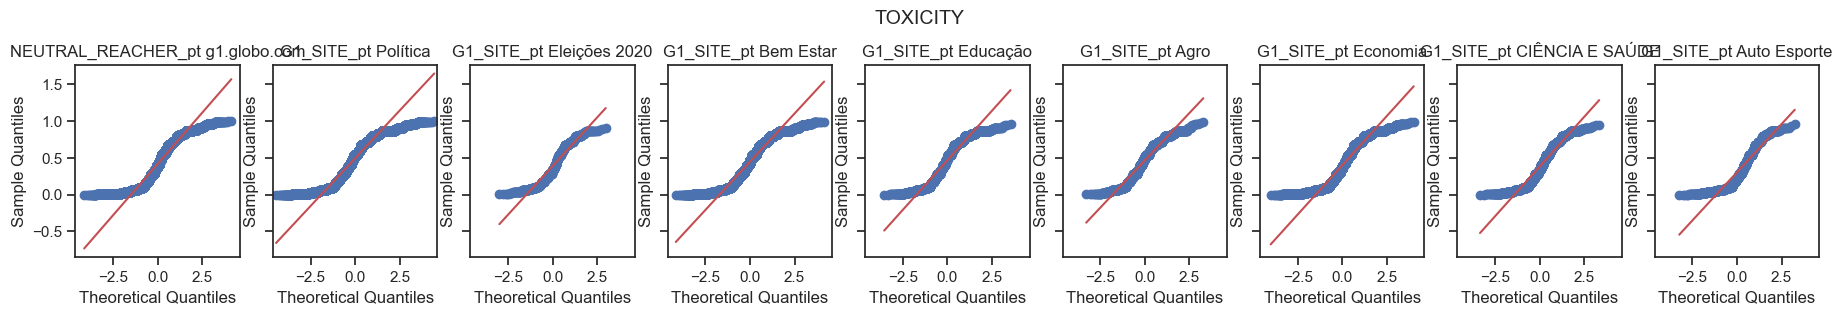

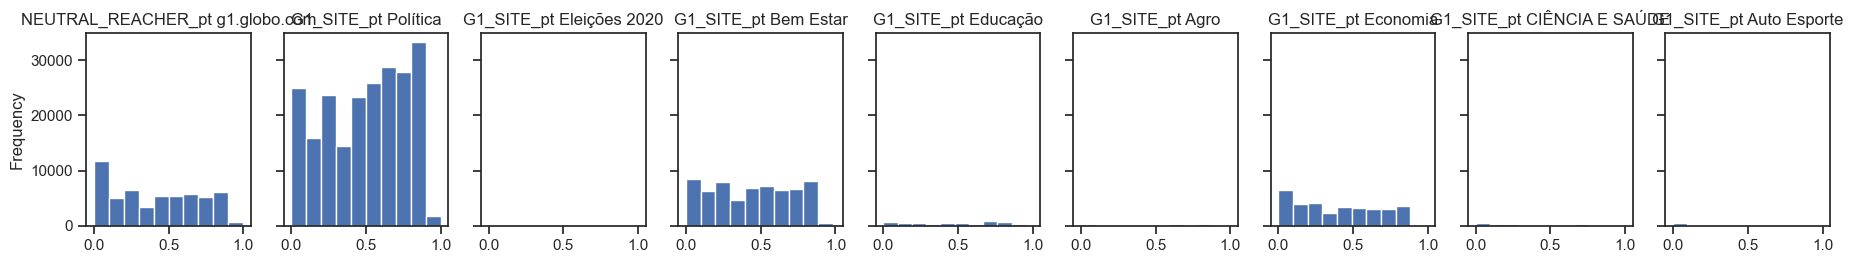

In [30]:
plot_qq(df_comments_filtered, group_by)

#### D’Agostino Normal Test

In [31]:
run_normal_test(df_comments_filtered, group_by)

,dataset_source,k²,k² (with p),N,p-value
0,NEUTRAL_REACHER_pt g1.globo.com,982481.040963,982481.041***,55057,0.000000e+00
1,G1_SITE_pt Política,235072.069915,235072.0699***,219735,0.000000e+00
2,G1_SITE_pt Eleições 2020,2163.394238,2163.3942***,702,0.000000e+00
3,G1_SITE_pt Bem Estar,137482.947132,137482.9471***,63011,0.000000e+00
4,G1_SITE_pt Educação,118091.676266,118091.6763***,5086,0.000000e+00
5,G1_SITE_pt Agro,2445.828120,2445.8281***,1962,0.000000e+00
6,G1_SITE_pt Economia,115085.351023,115085.351***,33437,0.000000e+00
7,G1_SITE_pt CIÊNCIA E SAÚDE,3860.054154,3860.0542***,2410,0.000000e+00
8,G1_SITE_pt Auto Esporte,252.947640,252.9476***,1683,1.183363e-55


#### Kolmogorov-Smirnov Test

In [32]:
run_ks_test(df_comments_filtered, group_by, report_h0_acceptance=True, alpha=.05)

G1_SITE_pt Eleições 2020 (N = 702)   VS  G1_SITE_pt Economia (N = 33437) 	KS = 0.045965167985684174	p-value = 0.10589658446165173 

G1_SITE_pt Eleições 2020 (N = 702)   VS  G1_SITE_pt CIÊNCIA E SAÚDE (N = 2410) 	KS = 0.05528247685924034	p-value = 0.06896110858811821 



,NEUTRAL_REACHER_pt g1.globo.com,G1_SITE_pt Política,G1_SITE_pt Eleições 2020,G1_SITE_pt Bem Estar,G1_SITE_pt Educação,G1_SITE_pt Agro,G1_SITE_pt Economia,G1_SITE_pt CIÊNCIA E SAÚDE,G1_SITE_pt Auto Esporte
NEUTRAL_REACHER_pt g1.globo.com,,0.128***,0.087***,0.069***,0.081***,0.097***,0.09***,0.108***,0.208***
G1_SITE_pt Política,,,0.197***,0.08***,0.054***,0.057***,0.154***,0.182***,0.313***
G1_SITE_pt Eleições 2020,,,,0.131***,0.151***,0.16***,0.046,0.055,0.174***
G1_SITE_pt Bem Estar,,,,,0.054***,0.044**,0.085***,0.118***,0.257***
G1_SITE_pt Educação,,,,,,0.041*,0.112***,0.135***,0.262***
G1_SITE_pt Agro,,,,,,,0.12***,0.147***,0.284***
G1_SITE_pt Economia,,,,,,,,0.035**,0.174***
G1_SITE_pt CIÊNCIA E SAÚDE,,,,,,,,,0.143***
G1_SITE_pt Auto Esporte,,,,,,,,,


#### Some examples for each source inside G1_SITE_pt

In the boxplot above there are curious cases: Wellbeing, Education and Agriculture have high toxicity. Why does it happen? Below we analyze some more toxic instances to understand why: they are generally people arguing about politics related to Health (in Wellbeing), Education or Agriculture.

For example, on Wellbeing, these were the most toxic comments:

- TOXICITY: 0.99  >>>>  Globo vai se fu** seus M****
- TOXICITY: 0.99  >>>>  Vcs bolsonaristas vai pagar caro por cada morte de um brasileiro. Eu juro que vão. Fanáticos de m****
- TOXICITY: 0.99  >>>>  Bolsonaro, faz um favor para esse pobre e f***** o pais: SE MATA CARA !!!

These are clearly attacks related to the political situation.
For example, on Wellbeing, these were the most toxic comments:

In [33]:
df_G1 = df_comments_filtered[['dataset_source', 'preprocessed_text', 'TOXICITY']]

for source in df_G1['dataset_source'].unique():
    df = df_G1[df_G1['dataset_source'] == source]
    
    print('\n==============\n'+source+'\n================')
    
    print('\nLESS TOXIC\n---------------')
    for i, row in df.sort_values('TOXICITY', ascending=True)[:3].iterrows():
        print('TOXICITY:', round(row['TOXICITY'], 2), ' >>>> ', row['preprocessed_text'][:100])

    print('\nMOST TOXIC\n---------------')
    for i, row in df.sort_values('TOXICITY', ascending=False)[:3].iterrows():
        print('TOXICITY:', round(row['TOXICITY'], 2), ' >>>> ', row['preprocessed_text'][:100])


NEUTRAL_REACHER_pt g1.globo.com

LESS TOXIC
---------------
TOXICITY: 0.0  >>>>  O chamado Sistema Único de Saúde foi criado em 1988. Só mudou de nome. Chamava-se Sistema Nacional d
TOXICITY: 0.0  >>>>  Ei
TOXICITY: 0.0  >>>>  ÚLTIMA PESQUISA PRESIDENCIAL 'CRUSOÉ' / EMPIRICUS Resultados e análise de Mario Sabino, Caio Junquei

MOST TOXIC
---------------
TOXICITY: 1.0  >>>>  Pare de cagar pela boca idiota.
TOXICITY: 1.0  >>>>  Cala boca idiota, teu nome faz jus ao teu comentário.
TOXICITY: 0.99  >>>>  Cala a boca idiota!

G1_SITE_pt Política

LESS TOXIC
---------------
TOXICITY: 0.0  >>>>  Segunda ex-mulher do presidente Jair Bolsonaro, Ana Cristina Siqueira Valle adquiriu 14 imóveis enqu
TOXICITY: 0.0  >>>>  Tudo bem, sr, Ramagem, eu acredito também em mula sem cabeça, Branca de neve e papai Noel.
TOXICITY: 0.0  >>>>  Tendo em vista que a mulher do Queiroz está desaparecido, alguém revistos as malas?

MOST TOXIC
---------------
TOXICITY: 1.0  >>>>  Vocês são uns lixos vermes seus otar

# NYT Analysis

The NYT comments dataset was used to compare the toxicity in Facebook page vs website comments section. 

In [34]:
group_by = 'dataset_source'
attributes = ['TOXICITY']
NYT_sources = [
    'NYT_SITE_en Politics', 
    'NYT_SITE_en Non-politics', 
    
    'PARTISAN_REACHER_en ny_times'
]

df_comments_filtered = df_comments[df_comments[group_by].isin(NYT_sources)]

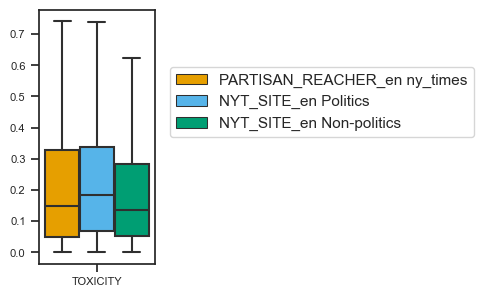

In [35]:
df_melted, df_summarized = analyze_comments_dataframe(
    df_comments_filtered, attributes, group_by=group_by, 
    legend_top=False, legend_ncols=1, width=1.5
)

## Yahoo News Analysis

The dataset of YAHOO comments, as well as the NYT, was used to check what the toxicity would be in the comments on their website compared to the comments on their Facebook page.

In [36]:
group_by = 'dataset_source'
attributes = ['TOXICITY']
YAHOO_sources = [
    'YAHOO_SITE_en --', 
    'FACEBOOK_OTHER_en yahoo_news'
]

df_comments_filtered = df_comments[df_comments[group_by].isin(YAHOO_sources)]

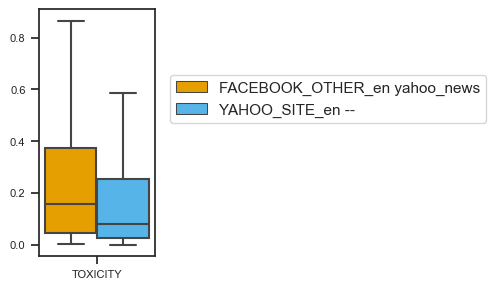

In [37]:
df_melted, df_summarized = analyze_comments_dataframe(
    df_comments_filtered, attributes, group_by=group_by, 
    legend_top=False, legend_ncols=1, width=1.5
)

# Facebook vs site influence on toxicity

Here we investigate were Facebook comments' toxicity differs from web comments toxicity for the NYT and Yahoo news media outlets. 

For that, we conduce the same analysis separatelly for each pair (NYT web vs FB; Yahoo web vs FB). 

Hypothesis:
* **H0:** Facebook is not correlated with toxicity.
* **H1:** Facebook is correlated with toxicity.

In [38]:
from scipy import stats

def test_correlation(x, y):
    results = stats.linregress(x=x, y=y)

    plt.figure(figsize=(3, 3))
    plt.plot(x, y, 'o', label='comment', alpha=.01)
    plt.plot(x, results.intercept + results.slope*x, 'r', label='fitted line')
    plt.locator_params(axis='x', nbins=2)
    plt.ylabel('TOXICITY')
    plt.legend()

    if results.pvalue < .001:
        # reject H0
        print('the correlation is statistically significant at p < .001')
    else:
        # accept H0
        print('the correlation isn\'t statistically significant at p < .001')
        
    return plt, results

In [39]:
facebook_datasets = [
    'PARTISAN_pt',
    'PARTISAN_REACHER_en',
    'FACEBOOK_NEUTRAL_en',
    'FACEBOOK_OTHER_en',
    'FACEBOOK_PARTISAN_en',
    'FACEBOOK_PERSON_en',
    'FACEBOOK_OTHER_en'
]

def tag_facebook_datasets(dataset):
    if dataset in facebook_datasets:
        return 1
    return 0

df_comments['is_facebook'] = df_comments['dataset'].apply(tag_facebook_datasets)

#### NYT Facebook vs Site correlation

the correlation is statistically significant at p < .001


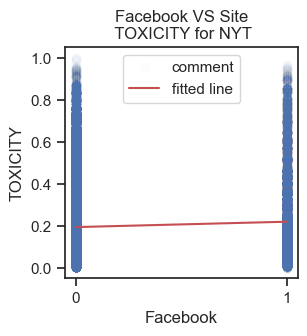

LinregressResult(slope=0.0257346270760004, intercept=0.19358539523810117, rvalue=0.035089982285257316, pvalue=4.211010049681645e-74, stderr=0.0014126891281791916)


In [40]:
# Get NYT site comments
df_site = df_comments[df_comments['dataset'] == 'NYT_SITE_en'][['is_facebook', 'TOXICITY']]

# Get NYT Facebook page comments
df_facebook = df_comments[df_comments['dataset_source'] == 'PARTISAN_REACHER_en ny_times'][['is_facebook', 'TOXICITY']]

df = pd.concat([df_site, df_facebook])
x = df['is_facebook']
y = df['TOXICITY']
    
ax, results = test_correlation(x, y)

ax.xlabel('Facebook')
ax.title('Facebook VS Site\n TOXICITY for NYT')
ax.show()

print(results)

#### Yahoo News Facebook vs Site correlation

the correlation is statistically significant at p < .001


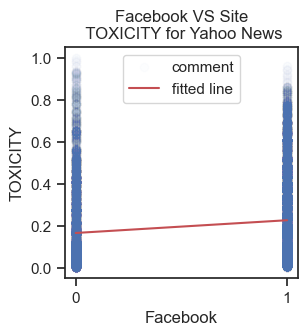

LinregressResult(slope=0.060687324532883356, intercept=0.16560990340690082, rvalue=0.1438824147423675, pvalue=3.050891680264326e-105, stderr=0.002770838969140406)


In [41]:
# Get Yahoo News site comments
df_site = df_comments[df_comments['dataset'] == 'YAHOO_SITE_en'][['is_facebook', 'TOXICITY']]

# Get Yahoo News Facebook page comments
df_facebook = df_comments[df_comments['dataset_source'] == 'FACEBOOK_OTHER_en yahoo_news'][['is_facebook', 'TOXICITY']]

df = pd.concat([df_site, df_facebook])
x = df['is_facebook']
y = df['TOXICITY']
    
ax, results = test_correlation(x, y)

ax.xlabel('Facebook')
ax.title('Facebook VS Site\n TOXICITY for Yahoo News')
ax.show()

print(results)

# Political topics influence on toxicity

Here we investigate wether political comments' toxicity differs from other topics toxicity for the G1 and NYT cases. 

#### NYT case

the correlation is statistically significant at p < .001


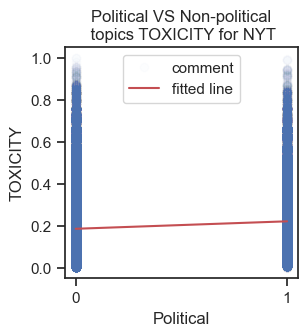

LinregressResult(slope=0.03555392638288831, intercept=0.1855684318212077, rvalue=0.0925409770760164, pvalue=0.0, stderr=0.0007575429512835567)


In [42]:
# Isolate NYT comments
df = df_comments[df_comments['dataset'] == 'NYT_SITE_en'][['source', 'TOXICITY']].copy()

# List of political sources in NYT
political_sources = ['Politics', 'Non-Politics']

# Get NYT political comments
df_political = df[df['source'].isin(political_sources)].copy()
df_political.loc[:, 'is_political'] = 1

# Get NYT other (non-political) page comments
df_other = df[~df['source'].isin(political_sources)].copy()
df_other.loc[:, 'is_political'] = 0

df = pd.concat([df_political, df_other])
x = df['is_political']
y = df['TOXICITY']

ax, results = test_correlation(x, y)

ax.xlabel('Political')
ax.title('Political VS Non-political\n topics TOXICITY for NYT')
ax.show()

print(results)

#### G1 case

the correlation is statistically significant at p < .001


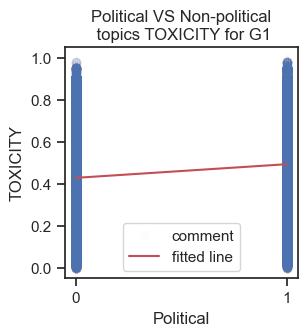

LinregressResult(slope=0.065135605498965, intercept=0.4280670237143692, rvalue=0.11592197606871232, pvalue=0.0, stderr=0.0009744556579820436)


In [43]:
# Get only G1 comments
df = df_comments[df_comments['dataset'] == 'G1_SITE_pt'][['source', 'TOXICITY']].copy()

# List of political source in G1
political_sources = ['Política', 'Eleições 2020']

# Get G1 political comments
df_political = df[df['source'].isin(political_sources)].copy()
df_political.loc[:, 'is_political'] = 1

# Get G1 other (non-political) page comments
df_other = df[~df['source'].isin(political_sources)].copy()
df_other.loc[:, 'is_political'] = 0

df = pd.concat([df_political, df_other])
x = df['is_political']
y = df['TOXICITY']

ax, results = test_correlation(x, y)

ax.xlabel('Political')
ax.title('Political VS Non-political\n topics TOXICITY for G1')
ax.show()

print(results)